# Zernike Polynomials and Wavefronts

In [53]:
import numpy as np
from numpy import sin, cos, tan, sqrt, pi, e, arctan
from math import factorial, atan2

import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

## Wavefront Sensing in Adaptive Optics
- **Example 10.1**: Use a quad cell (with each quad cell element subdivided into 4 x 4 pixels) to demonstrate the positioning of the focused spot and the resulting slopes. Each pixel shows a 1 or a 0 value to represent its illumination state.

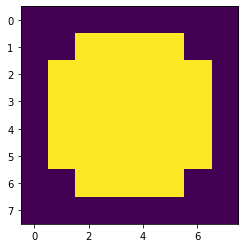

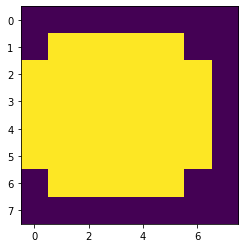

In [18]:
# parameters

# -- even distribution
QC1 = np.array([
    [0, 0, 0, 0,   0, 0, 0, 0],
    [0, 0, 1, 1,   1, 1, 0, 0],
    [0, 1, 1, 1,   1, 1, 1, 0],
    [0, 1, 1, 1,   1, 1, 1, 0],
    
    [0, 1, 1, 1,   1, 1, 1, 0],
    [0, 1, 1, 1,   1, 1, 1, 0],
    [0, 0, 1, 1,   1, 1, 0, 0],
    [0, 0, 0, 0,   0, 0, 0, 0]
])

# -- shifted left
QC2 = np.array([
    [0, 0, 0, 0,   0, 0, 0, 0],
    [0, 1, 1, 1,   1, 1, 0, 0],
    [1, 1, 1, 1,   1, 1, 1, 0],
    [1, 1, 1, 1,   1, 1, 1, 0],
    
    [1, 1, 1, 1,   1, 1, 1, 0],
    [1, 1, 1, 1,   1, 1, 1, 0],
    [0, 1, 1, 1,   1, 1, 0, 0],
    [0, 0, 0, 0,   0, 0, 0, 0]
])

plt.figure();
plt.imshow(QC1);
plt.figure();
plt.imshow(QC2);

In [31]:
# identify quadrants

QC = QC2

PA = QC[0:4, 0:4]
PB = QC[0:4, 4:8]
PC = QC[4:8, 4:8]
PD = QC[4:8, 0:4]

# -- calculate intensities
A = sum(sum(PA[:]))
B = sum(sum(PB[:]))
C = sum(sum(PC[:]))
D = sum(sum(PD[:]))

In [32]:
# calculate slopes

norm = A+B+C+D
Sx = ((B+C) - (A+D)) / norm
Sy = ((A+B) - (C+D)) / norm

In [34]:
Sx   # negative slope, tilted wavefront
Sy

-0.15789473684210525

0.0

## Zernike Polynomials
- **Example 10.2**: Use a Zernike polynomial calculator to generate an image. The polynomial is selected by inputting the values of m and n within the code.

In [109]:
# calculate radial polynomial function

def calcRmn(m, n):
    
    # parameters
    OET = n-m           # check if odd or even
    mC = int(OET/2)     # number of coefficients calculated
    
    
    # initialize
    PC = np.zeros(mC)
    PExp = np.zeros(mC)
    
    
    # calculate radial polynomial
    if OET % 2 == 0:
        k = 0
        Rmn = 0
        while k < mC:
            Rmn = (-1)**k * factorial((n+m)/2 - k) * factorial((n-m)/2 - k)
            k += 1
            PC[k-1] = Rmn
            PExp[k-1] = (n - 2*(k-1))
            
    
    return PC, PExp

In [117]:
# zernike polynomial stage

def calcZP(RmnC, rhoExp, m, n, pX):
    
    mD = np.zeros((pX, pX))
    
    for r in range(1, pX+1):
        for c in range(1, pX+1):
            x = (2*c - pX - 1) / pX
            y = (2*r - pX - 1) / pX
            
            phi = atan2(y, x)
            rho = sqrt(x**2 + y**2)
            
            RMN = 0
            for count in range(0, RmnC.shape[0]):
                RMN += RmnC[count] * rho**rhoExp[count]
                
            if m < 0:
                Z = RMN * sin(abs(m) * phi)
            else:
                Z = RMN * cos(abs(m) * phi)
                
            if rho <= 1:
                mD[r-1, c-1] = Z
            else:
                mD[r-1, c-1] = 0
                
    
    return mD

In [133]:
# set zernike polynomial (Zmn)

pixels = 1000
m = 7    # note: m < n
n = 15

RmnC, rhoExp = calcRmn(abs(m), n)
myData = np.zeros((pixels, pixels))
myData = calcZP(RmnC, rhoExp, m, n, pixels)

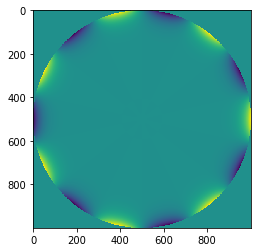

In [134]:
plt.figure();
plt.imshow(myData);

In [102]:
a = np.zeros((1, 6))
a.shape

(1, 6)

In [94]:
myData.shape

(1000, 1000)